In [77]:
import numpy as np

import matplotlib.pyplot as plt
from funcs import plot_settings
plot_settings()

plt.rcParams["figure.figsize"] = (15, 8)

In [78]:
# v1
data = np.load("var1_s1_0x1_s2_5_v_2.npy")

In [79]:
t, x = data

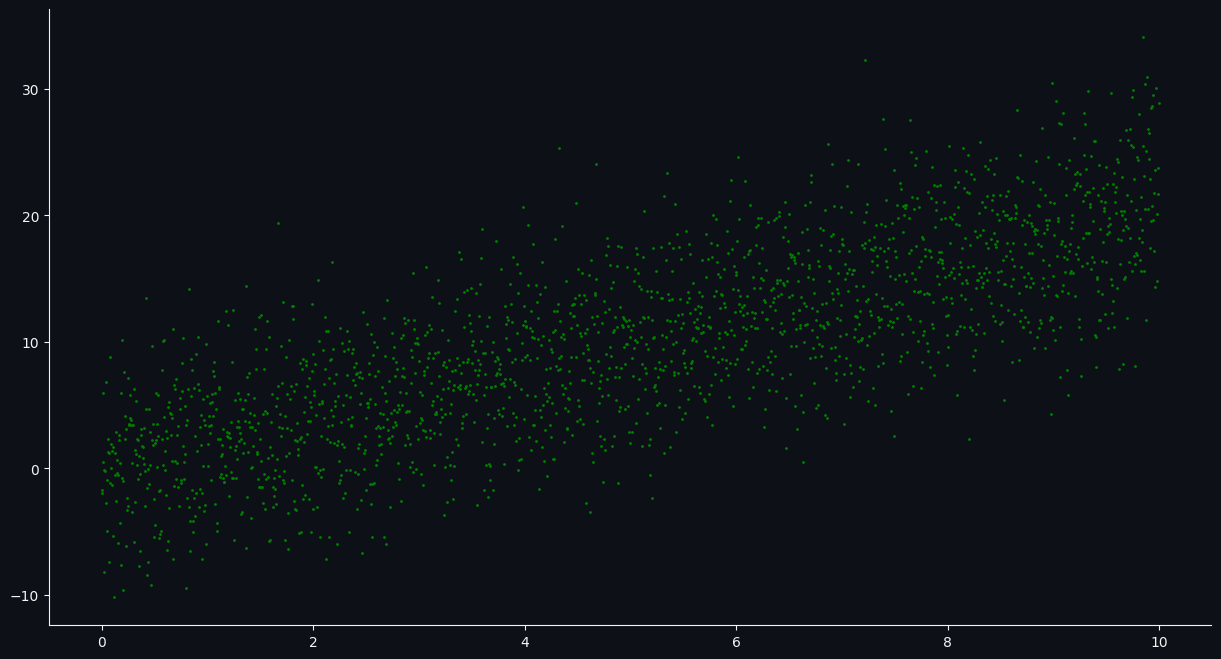

In [80]:
plt.scatter(t, x, 1)

In [81]:
class Model:
    def __init__(self, t, x):
        self.t = t
        self.x = x
        self.dt = t[1] - t[0]
        self.v = 2

    
    def step(self, curr_x):
        return curr_x + self.v * self.dt
    

In [82]:
model = Model(t, x)

In [83]:
np.diff(t)

array([0.005, 0.005, 0.005, ..., 0.005, 0.005, 0.005])

In [84]:
def filter_kalman(dt, x, model = lambda curr_x, dt: curr_x + 2 * dt):
    s1 = 0.1
    s2 = 2
    res = np.zeros_like(x)
    f = lambda x_data, x_model: s1**2 / (s1**2 + s2**2) * x_data + s2**2 / (s1**2 + s2**2) * x_model
    res[0] = f(x[0], 0)
    for i in range(1, len(x)):
        res[i] = f(x[i], model(res[i-1], dt))
    
    return res


In [85]:
x_noise = x + np.array([int(np.random.rand() > 0.99)*np.random.random()*100 for _ in range(len(x))])

In [86]:
x_exact = filter_kalman(0.005, x_noise, lambda curr_x, dt: curr_x + 2 * dt)
x_filtered = filter_kalman(0.005, x_noise, lambda curr_x, dt: curr_x + 2 * dt)

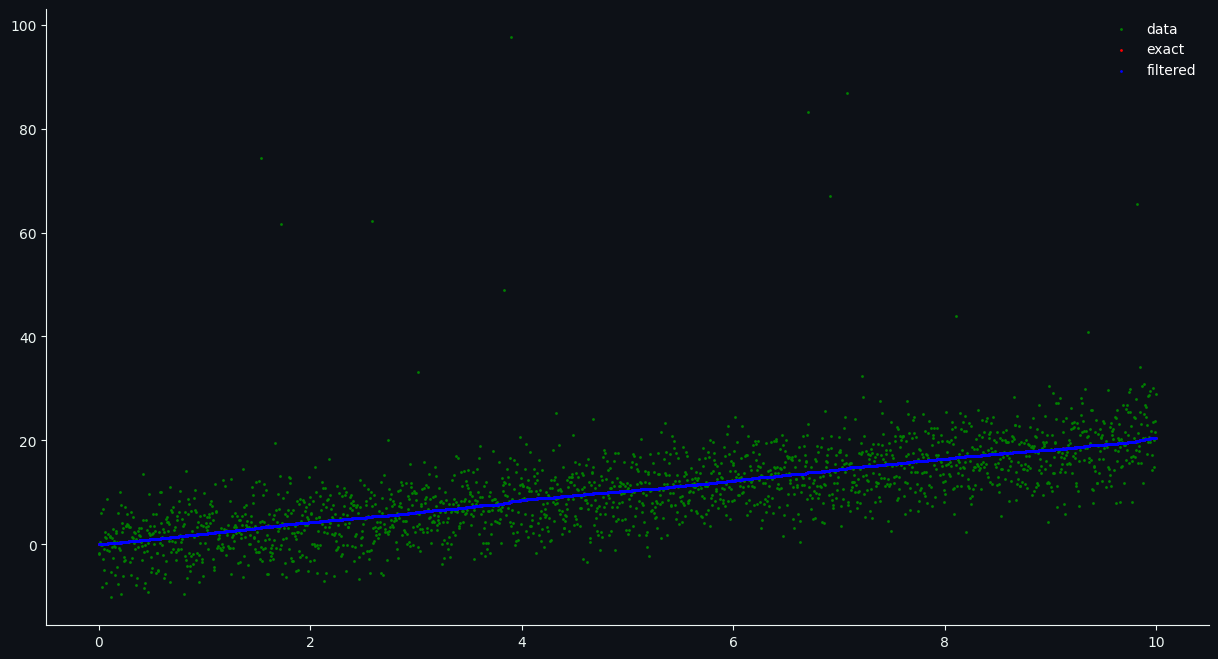

In [87]:
plt.scatter(t, x_noise, 1, label='data')
plt.scatter(t, x_exact, 1, label="exact")
plt.scatter(t, x_filtered, 1, label="filtered")
plt.legend()

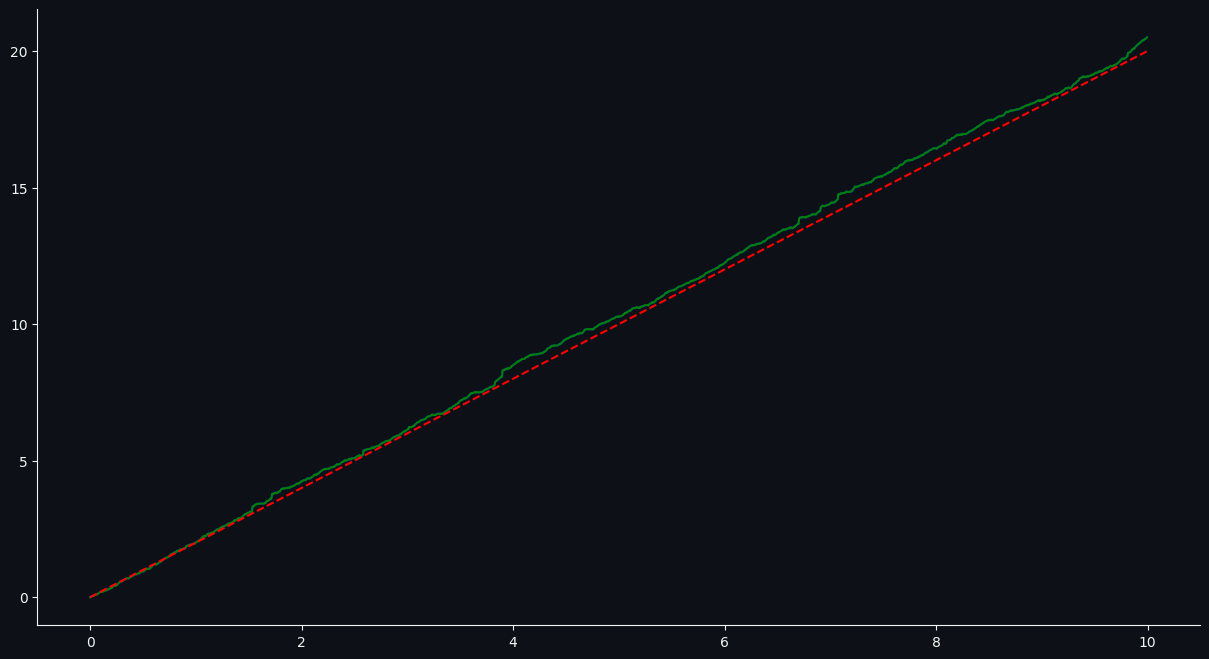

In [88]:
plt.plot(t, x_filtered, '-b')
plt.plot(t, x_exact, '-g')
plt.plot(t, 2*t, '--r')
plt.show()